In [23]:
import pandas as pd

import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objects as go

In [ ]:
!pip install chart_studio

In [1]:
import chart_studio.plotly as py
import chart_studio.tools as tls
from ipywidgets import interactive, HBox, VBox



In [14]:
import sys
import pandas as pd

    
def get_table(link_1,link_2):

    df = pd.read_html(link_1)[0]
    df_2 = pd.read_html(link_2)[0]
    df = df.dropna(subset = ['MP'])
    df_2 = df_2.dropna(subset = ['MP','TS%'])
    df = df[df['MP'] != 'MP']
    df_2 = df_2[df_2['MP'] != 'MP']
    final_df = df.merge(df_2)
    final_df['MP'] = final_df['MP'].astype(float)
    final_df['PTS'] = final_df['PTS'].astype(float)
    final_df['TS%'] = final_df['TS%'].astype(float)
    final_df = final_df[final_df['MP'] >700]
    
    final_df = final_df.drop(columns = ['Unnamed: 24','Unnamed: 29','Unnamed: 19'])
    send_df = final_df[['Player','TS%','PTS','MP','Tm']]

    
    return send_df
    
def main(my_dict):
    team = my_dict['team']
    df = get_table()
    return df.to_dict()


In [25]:
link_1 ='https://www.basketball-reference.com/leagues/NBA_2011_per_poss.html#per_poss_stats'
link_2 = 'https://www.basketball-reference.com/leagues/NBA_2011_advanced.html#advanced_stat'

df = pd.read_html(link_1)[0]
df_2 = pd.read_html(link_2)[0]

#df_2 = df_2.dropna()


In [28]:
tables = []
for i in range(2010,2023):
    link_1 ='https://www.basketball-reference.com/leagues/NBA_'+str(i)+'_per_poss.html#per_poss_stats'
    link_2 = 'https://www.basketball-reference.com/leagues/NBA_'+str(i)+'_advanced.html#advanced_stat'
    
    df = get_table(link_1,link_2)
    tables.append(df)


In [30]:
tables[12]

,Player,TS%,PTS,MP,Tm
0,Precious Achiuwa,0.503,19.2,1725.0,TOR
1,Steven Adams,0.560,12.6,1999.0,MEM
2,Bam Adebayo,0.608,29.3,1825.0,MIA
4,LaMarcus Aldridge,0.604,28.0,1050.0,BRK
5,Nickeil Alexander-Walker,0.475,23.3,1466.0,TOT
...,...,...,...,...,...
787,Delon Wright,0.576,11.6,1452.0,ATL
792,Thaddeus Young,0.548,18.7,845.0,TOT
795,Trae Young,0.603,39.9,2652.0,ATL
796,Omer Yurtseven,0.546,21.2,706.0,MIA


In [56]:
df = tables[7]
df

,Player,TS%,PTS,MP,Tm
0,Álex Abrines,0.560,18.9,1055.0,OKC
4,Steven Adams,0.589,18.6,2389.0,OKC
5,Arron Afflalo,0.559,16.5,1580.0,SAC
8,LaMarcus Aldridge,0.532,27.1,2335.0,SAS
9,Lavoy Allen,0.485,10.2,871.0,IND
...,...,...,...,...,...
572,Marvin Williams,0.551,18.6,2295.0,CHO
586,Nick Young,0.588,24.8,1556.0,LAL
587,Thaddeus Young,0.562,18.2,2237.0,IND
588,Cody Zeller,0.604,18.6,1725.0,CHO


In [57]:

teams = list(df['Tm'].unique())

In [58]:
teams

['OKC',
 'SAC',
 'SAS',
 'IND',
 'MEM',
 'POR',
 'TOT',
 'DAL',
 'HOU',
 'MIL',
 'NYK',
 'ORL',
 'MIA',
 'PHO',
 'DEN',
 'CHO',
 'DET',
 'ATL',
 'WAS',
 'MIN',
 'LAL',
 'BRK',
 'BOS',
 'CHI',
 'TOR',
 'GSW',
 'PHI',
 'LAC',
 'NOP',
 'UTA',
 'CLE']

In [59]:
my_list = []
i = 0
length = len(teams)
seen = [False for i in range(length+ 1) ]

seen[i] = True
my_list.append(dict(label = 'all_teams',

                  args = [{'visible':[i for i in seen]},
                          {'title': 'all_teams',
                           'showlegend':False}]))
seen[i] = False
i +=1
for team in teams:
    #print(i)
    df_team = df[df['Tm'] == team]
    seen[i] = True
    
    my_list.append(dict(label = team,
                  method = 'update',

                  args = [{'visible':[i for i in seen]},
                          {'title': team,
                           'showlegend':False}]))
    seen[i] = False
    i+=1


In [60]:
df['PTS'].max()

df['TS%'] *= 100

In [61]:
zmax = df['TS%'].max()
zmin = df['TS%'].min()
zmin

38.7

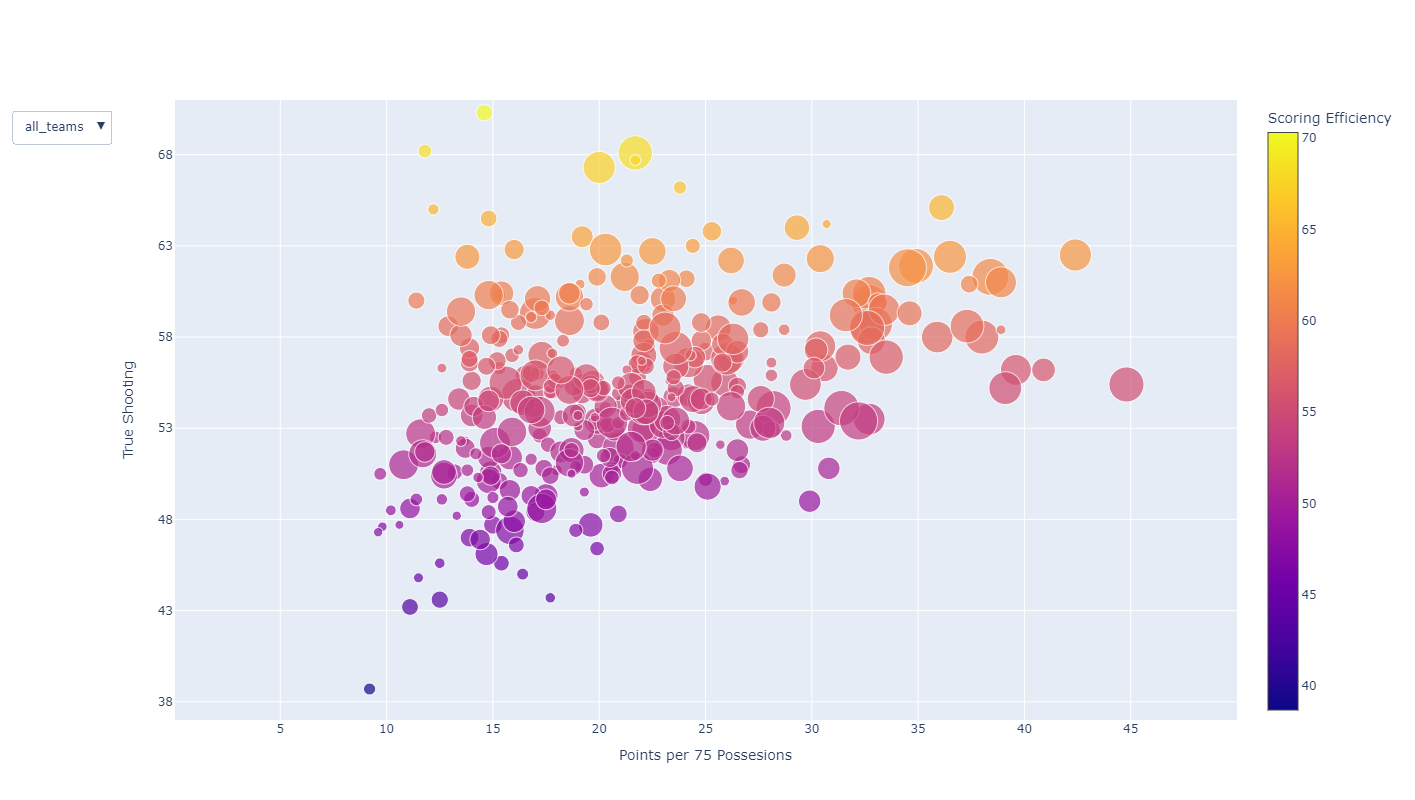

In [62]:
zmax = df['TS%'].max()
zmin = df['TS%'].min()

fig = go.Figure()
fig.add_trace(
        go.Scatter(

            visible = True,
            x = df['PTS'],
            y = df['TS%'],
            text = df['Player'],
            hovertemplate =
            '<b>%{text}</b>'+
    '<br><i>Points per 75</i>: %{x:.2f}<br>'+
    'True Shooting: %{y}'
    ,
            name = 'all_teams',
            marker=dict(
            cmin=zmin ,
            cmax=zmax,
            size=df['MP'] / 80,
            colorbar=dict(
            title="Scoring Efficiency",
            tickformatstops = [{'dtickrange': [40,80]
                              }]
           
    
        ),
        autocolorscale = True,
        color=  df['TS%'],

    ),
   

    mode="markers"
        ))

for team in teams:
    df_team = df[df['Tm'] == team]
   
    
    fig.add_trace(
        go.Scatter(

            visible = False,
            x = df_team['PTS'],
            y = df_team['TS%'],
            text = df_team['Player'],
            hovertemplate =
            '<b>%{text}</b>'+
    '<br><i>Points per 75</i>: %{x:.2f}<br>'+
    'True Shooting: %{y}'
    ,
            name = team,
            marker=dict(
            cmin=zmin ,
            cmax=zmax,
            size=df_team['MP'] / 80,
            colorbar=dict(
            title="Scoring Efficiency"
           
    
        ),
        autocolorscale = True,
        color=  df_team['TS%'],

    ),
   

    mode="markers"
        )
        
    )  
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,
showlegend= False)  
fig.update_layout(
updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons= my_list,
        direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            
         
)],
)
fig.update_layout(yaxis_range=[int(zmin -1),int(zmax +1)], xaxis_range = [0,50])
fig.update_yaxes(tickvals=[i for i in range(int(zmin),int(zmax),5)], title_text = "True Shooting",)
fig.update_xaxes(tickvals = [i for i in range (5,50,5)], title_text = 'Points per 75 Possesions')

fig.show()

In [55]:
zmax

65.10000000000001

In [ ]:
fig.write_html("index.html")